# Display  the  graph  plots  of the  Scatter  and  histogram  using  Linear  Regression,and SVM methods. Also display the boxplot and scatter plotsusing Logistic Regression method.

In [1]:
import pandas as pd
import numpy as np

In [2]:
breast_cancer = pd.read_csv('breast_cancer.csv')

In [3]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
breast_cancer.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [5]:
breast_cancer['diagnosis'] =  pd.get_dummies(breast_cancer['diagnosis'],drop_first=True)

In [6]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [8]:
X = breast_cancer.drop('diagnosis',axis=1)
y = breast_cancer['diagnosis']

In [9]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=121)

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model

In [12]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)
lin_reg_pred = linear_model.predict(X_test_scaled)
lin_reg_pred = np.array(list(map(lambda x : 1 if(x>0.5) else 0,lin_reg_pred)))

# Logistic Regression Model

In [13]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled,y_train)
log_reg_pred = logistic_model.predict(X_test_scaled)

# Support Vector Machine

In [14]:
svm_model = SVC()
svm_model.fit(X_train_scaled,y_train)
svm_pred = svm_model.predict(X_test_scaled)

# Evaluation on different models

In [15]:
print("Classification Report for Linear Regression Model")
print(classification_report(y_test,lin_reg_pred))

Classification Report for Linear Regression Model
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [16]:
print("Classification Report for Logistic Regression Model")
print(classification_report(y_test,log_reg_pred))

Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [17]:
print("Classification Report for Support Vector Machine")
print(classification_report(y_test,svm_pred))

Classification Report for Support Vector Machine
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       107
           1       0.98      0.98      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
# Pairplots between some features with mean values
# it contains both scatter and hist plots
mean_columns = ['texture_mean','radius_mean','concavity_mean','perimeter_mean']

In [20]:
# Arrangements to create hue in pairplot
X_test.loc[:,'lin_reg_pred']= lin_reg_pred
X_test.loc[:,'log_reg_pred'] = log_reg_pred
X_test.loc[:,'svm_pred'] = svm_pred

C:\Users\karnk\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\karnk\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\karnk\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

# Predictions using linear regression model

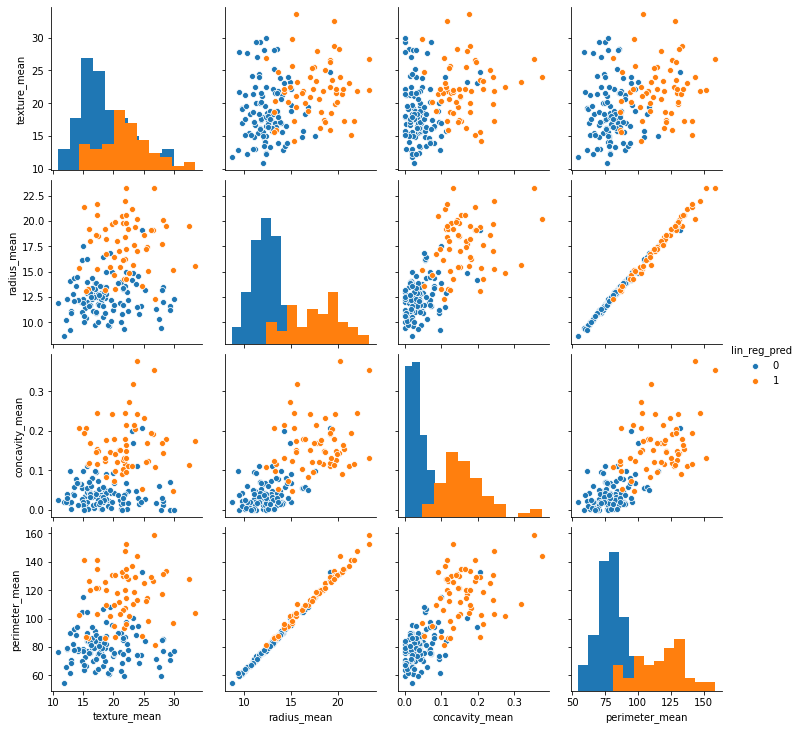

In [21]:
plot = sns.pairplot(data=X_test,vars=mean_columns,hue='lin_reg_pred',diag_kind='hist')
plt.show()

# Predictions using Logistic regression model

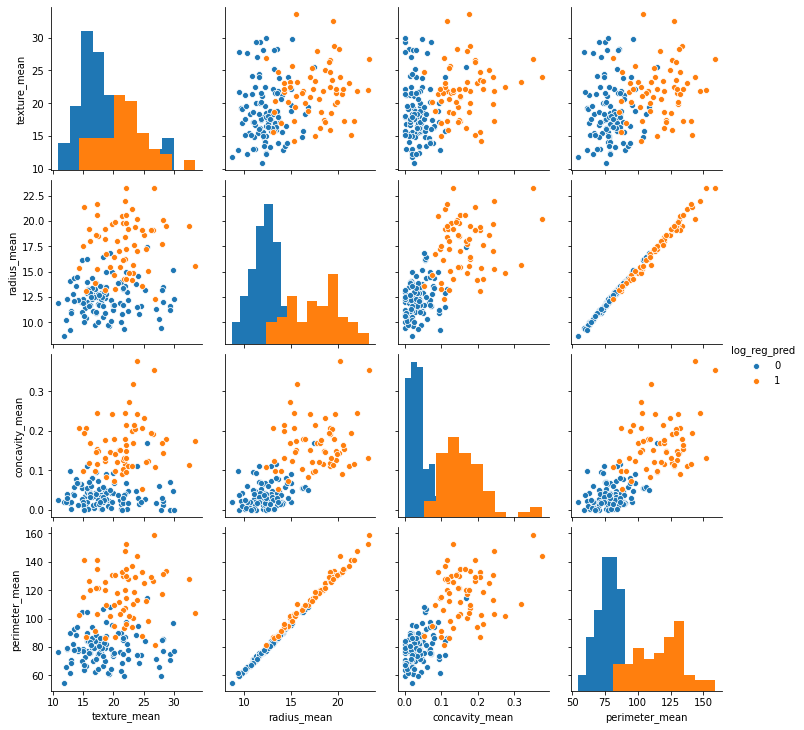

In [22]:
plot = sns.pairplot(data=X_test,vars=mean_columns,hue='log_reg_pred',diag_kind='hist')
plt.show()

# Predictions using Support Vector Machine

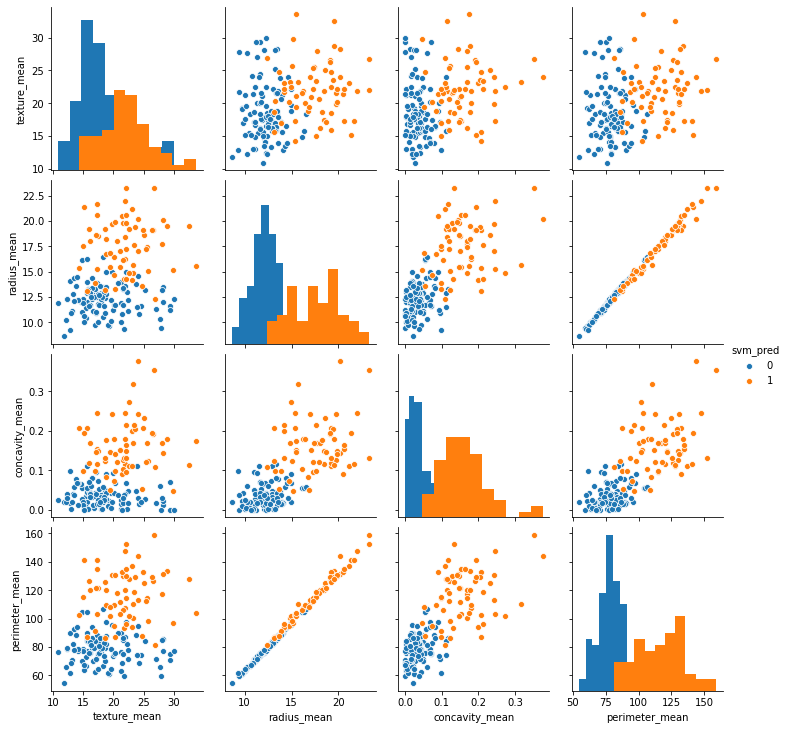

In [23]:
plot = sns.pairplot(data=X_test,vars=mean_columns,hue='svm_pred',diag_kind='hist')
plt.show()